<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 168.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 171.1 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [4]:
## Write your code here
# 2. Display shape of original dataset
print("Original dataset shape:", df.shape)

# 3. Define subset of columns to check for duplicates
subset_cols = [
    'MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
    'Age', 'CodingActivities', 'LearnCodeOnline',
    'YearsCodePro', 'DevType'
]

# 4. Identify number of duplicate rows based on subset
duplicates = df.duplicated(subset=subset_cols)
num_duplicates = duplicates.sum()

print("Number of duplicate rows based on subset columns:", num_duplicates)

Original dataset shape: (65437, 114)
Number of duplicate rows based on subset columns: 4853


##### Task 2: Remove the duplicate rows from the dataframe.



In [5]:
## Write your code here
# 1. Remove duplicates based on subset columns
df_cleaned = df.drop_duplicates(subset=subset_cols)

# 2. Verify removal
print("Cleaned dataset shape:", df_cleaned.shape)

# Confirm there are no remaining duplicates
remaining_duplicates = df_cleaned.duplicated(subset=subset_cols).sum()
print("Remaining duplicates:", remaining_duplicates)


Cleaned dataset shape: (60584, 114)
Remaining duplicates: 0


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [6]:
## Write your code here
# Count missing values in each column
missing_counts = df_cleaned.isnull().sum()

# Filter to show only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

# Sort and display
missing_counts = missing_counts.sort_values(ascending=False)
print("Missing values per column:\n", missing_counts)

Missing values per column:
 AINextMuch less integrated    59489
AINextLess integrated         58346
AINextNo change               48553
AINextMuch more integrated    47638
EmbeddedAdmired               44379
                              ...  
DevType                        2856
AISelect                       2630
YearsCode                      2440
LearnCode                      1871
EdLevel                        1627
Length: 109, dtype: int64


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [7]:
## Write your code here
print("Missing values in RemoteWork:", df_cleaned['RemoteWork'].isnull().sum())


Missing values in RemoteWork: 9117


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [8]:
## Write your code here
print(df_cleaned['RemoteWork'].value_counts(dropna=False))


RemoteWork
Hybrid (some remote, some in-person)    21484
Remote                                  19852
In-person                               10131
NaN                                      9117
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [9]:
## Write your code here
# Save counts before imputation
remotework_counts_before = df_cleaned['RemoteWork'].value_counts()
remotework_counts_before_df = remotework_counts_before.reset_index()
remotework_counts_before_df.columns = ['RemoteWork', 'Count']


In [12]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 142.8 MB/s eta 0:00:00


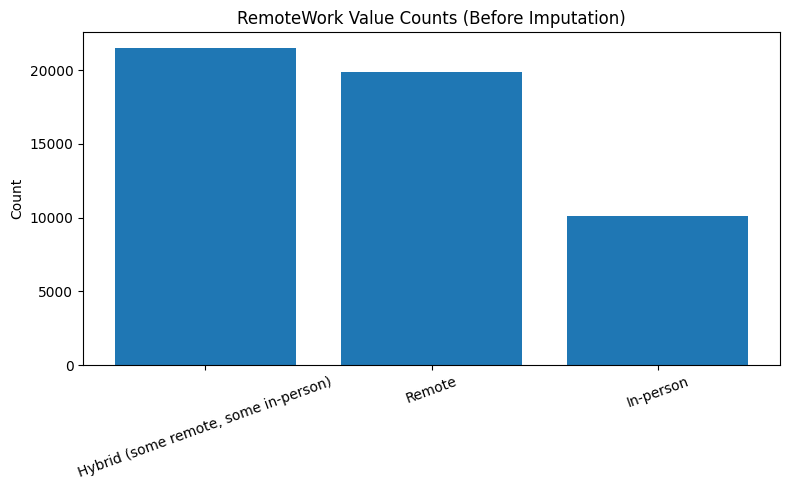

In [13]:
import matplotlib.pyplot as plt

# Bar plot for RemoteWork values before imputation
plt.figure(figsize=(8, 5))
plt.bar(remotework_counts_before_df['RemoteWork'], remotework_counts_before_df['Count'])
plt.title("RemoteWork Value Counts (Before Imputation)")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [15]:
## Write your code here
# Impute missing values in RemoteWork
df_cleaned['RemoteWork'] = df_cleaned['RemoteWork'].fillna("Hybrid (some remote, some in-person)")
print("Missing values in RemoteWork:", df_cleaned['RemoteWork'].isnull().sum())

Missing values in RemoteWork: 0


/tmp/ipykernel_300/3510501782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['RemoteWork'] = df_cleaned['RemoteWork'].fillna("Hybrid (some remote, some in-person)")


In [18]:
# Save post-imputation value counts
remotework_counts_after = df_cleaned['RemoteWork'].value_counts()
remotework_counts_after_df = remotework_counts_after.reset_index()
remotework_counts_after_df.columns = ['RemoteWork', 'Count_After']



In [19]:
# Combine into a single DataFrame for a stacked bar chart
# Merge before and after counts
comparison_df = remotework_counts_before_df.merge(remotework_counts_after_df, on='RemoteWork')
comparison_df.columns = ['RemoteWork', 'Count_Before', 'Count_After']


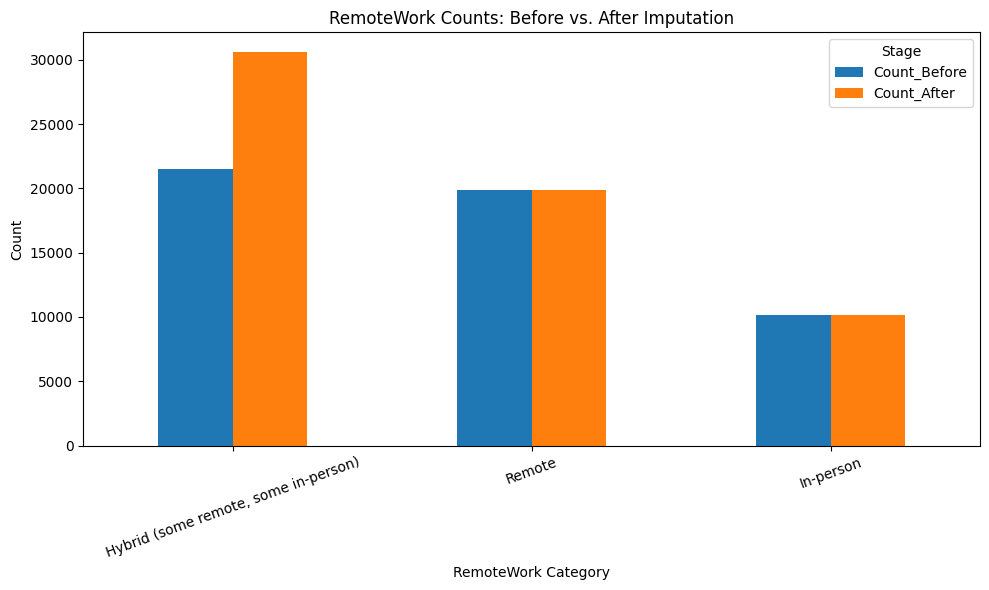

In [21]:
# Set 'RemoteWork' as index for cleaner plotting
comparison_df.set_index('RemoteWork')[['Count_Before', 'Count_After']].plot(
    kind='bar', figsize=(10,6), stacked=False)

plt.title("RemoteWork Counts: Before vs. After Imputation")
plt.ylabel("Count")
plt.xlabel("RemoteWork Category")
plt.xticks(rotation=20)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()



##### Task 8: Check for any compensation-related columns and describe their distribution.



In [23]:
# Select numeric compensation-related columns
comp_columns = ['CompTotal', 'ConvertedCompYearly']

# Show summary stats
print(df_cleaned[comp_columns].describe())


           CompTotal  ConvertedCompYearly
count   3.297000e+04         2.302900e+04
mean   3.033060e+145         8.613505e+04
std    5.507323e+147         1.880111e+05
min     0.000000e+00         1.000000e+00
25%     6.000000e+04         3.264000e+04
50%     1.100000e+05         6.500000e+04
75%     2.500000e+05         1.079370e+05
max    1.000000e+150         1.625660e+07


In [24]:
# Check missing values for compensation columns
comp_columns = ['CompTotal', 'ConvertedCompYearly']
print(df_cleaned[comp_columns].isnull().sum())


CompTotal              27614
ConvertedCompYearly    37555
dtype: int64


In [25]:
# Include percentage missing
total_rows = len(df_cleaned)
missing_info = df_cleaned[comp_columns].isnull().sum().to_frame(name='Missing Count')
missing_info['Percent Missing'] = (missing_info['Missing Count'] / total_rows) * 100
print(missing_info)


                     Missing Count  Percent Missing
CompTotal                    27614        45.579691
ConvertedCompYearly          37555        61.988314


In [26]:
# Create boolean masks
comp_total_missing = df_cleaned['CompTotal'].isnull()
converted_missing = df_cleaned['ConvertedCompYearly'].isnull()

# Count each category
both_missing = (comp_total_missing & converted_missing).sum()
only_comptotal_missing = (comp_total_missing & ~converted_missing).sum()
only_converted_missing = (~comp_total_missing & converted_missing).sum()

# Print results
print("Missing values breakdown:")
print(f"Missing both CompTotal and ConvertedCompYearly: {both_missing}")
print(f"Missing only CompTotal: {only_comptotal_missing}")
print(f"Missing only ConvertedCompYearly: {only_converted_missing}")


Missing values breakdown:
Missing both CompTotal and ConvertedCompYearly: 27614
Missing only CompTotal: 0
Missing only ConvertedCompYearly: 9941


In [27]:
both_available = df_cleaned[df_cleaned['CompTotal'].notnull() & df_cleaned['ConvertedCompYearly'].notnull()]
both_available['Ratio'] = both_available['CompTotal'] / both_available['ConvertedCompYearly']
print(both_available['Ratio'].describe())


count    23029.000000
mean       354.038679
std       3142.682417
min          0.306680
25%          0.931047
50%          1.000000
75%          5.362330
max      42105.263158
Name: Ratio, dtype: float64


/tmp/ipykernel_300/3111418476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  both_available['Ratio'] = both_available['CompTotal'] / both_available['ConvertedCompYearly']


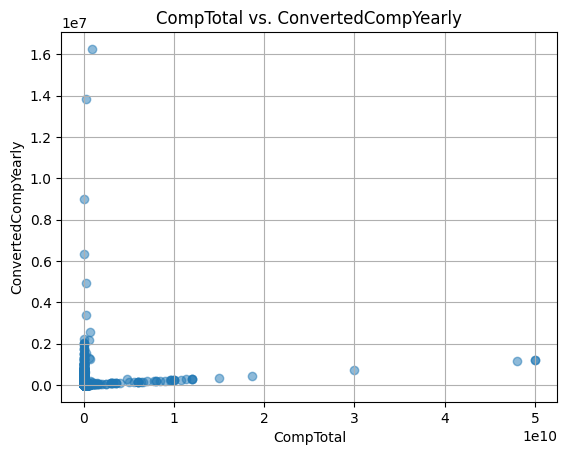

In [28]:
import matplotlib.pyplot as plt

plt.scatter(both_available['CompTotal'], both_available['ConvertedCompYearly'], alpha=0.5)
plt.xlabel('CompTotal')
plt.ylabel('ConvertedCompYearly')
plt.title('CompTotal vs. ConvertedCompYearly')
plt.grid(True)
plt.show()


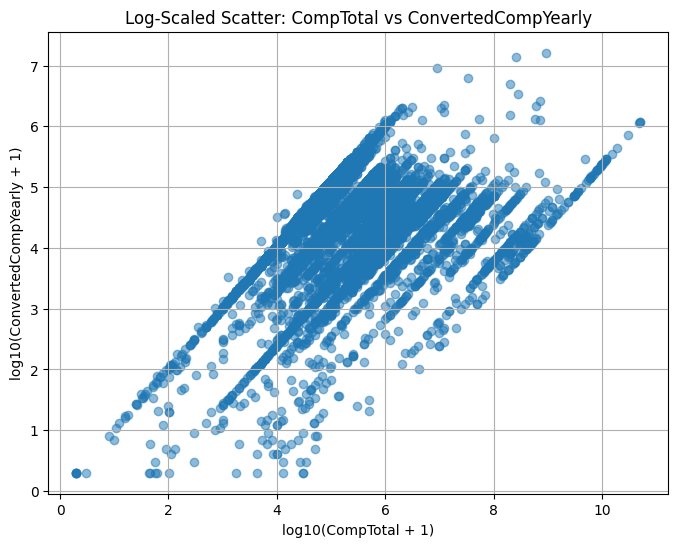

In [29]:
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(
    np.log10(both_available['CompTotal'] + 1),
    np.log10(both_available['ConvertedCompYearly'] + 1),
    alpha=0.5
)
plt.xlabel('log10(CompTotal + 1)')
plt.ylabel('log10(ConvertedCompYearly + 1)')
plt.title('Log-Scaled Scatter: CompTotal vs ConvertedCompYearly')
plt.grid(True)
plt.show()


In [30]:
# Calculate 75th percentiles
q3_comptotal = df_cleaned['CompTotal'].quantile(0.75)
q3_converted = df_cleaned['ConvertedCompYearly'].quantile(0.75)

# Filter to remove rows above Q3 in either column
filtered_df = df_cleaned[
    (df_cleaned['CompTotal'] <= q3_comptotal) &
    (df_cleaned['ConvertedCompYearly'] <= q3_converted)
]


In [31]:
print("Original size:", df_cleaned.shape[0])
print("Filtered size:", filtered_df.shape[0])


Original size: 60584
Filtered size: 12614


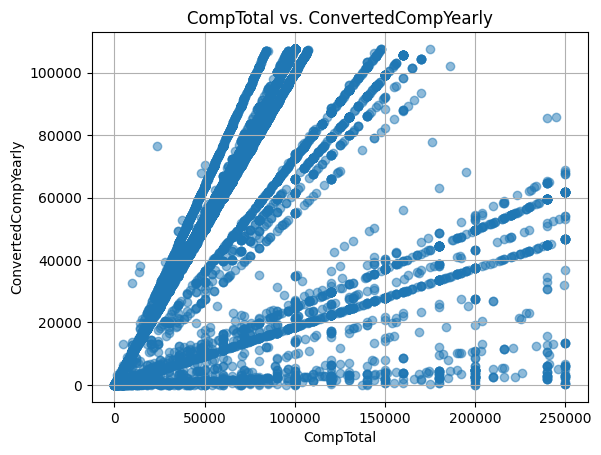

In [32]:
import matplotlib.pyplot as plt

plt.scatter(filtered_df['CompTotal'], filtered_df['ConvertedCompYearly'], alpha=0.5)
plt.xlabel('CompTotal')
plt.ylabel('ConvertedCompYearly')
plt.title('CompTotal vs. ConvertedCompYearly')
plt.grid(True)
plt.show()

In [39]:
print(filtered_df['ConvertedCompYearly'].describe())
print('')
print(filtered_df['CompTotal'].describe())

count     12614.000000
mean      53101.251942
std       30786.077361
min           1.000000
25%       29000.000000
50%       53703.000000
75%       77332.000000
max      107586.000000
Name: ConvertedCompYearly, dtype: float64

count     12614.000000
mean      67553.432694
std       43891.940070
min           1.000000
25%       40000.000000
50%       60000.000000
75%       86000.000000
max      250000.000000
Name: CompTotal, dtype: float64


In [42]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 153.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 154.2 MB/s eta 0:00:0000:01


In [43]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop any remaining rows with missing values
regression_df = filtered_df[['CompTotal', 'ConvertedCompYearly']].dropna()

# Reshape inputs for sklearn
X = regression_df['CompTotal'].values.reshape(-1, 1)
y = regression_df['ConvertedCompYearly'].values.reshape(-1, 1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Output model coefficients
print(f"Model: ConvertedCompYearly ≈ {model.coef_[0][0]:.4f} × CompTotal + {model.intercept_[0]:.2f}")


Model: ConvertedCompYearly ≈ 0.2738 × CompTotal + 34606.32


In [44]:
from sklearn.metrics import r2_score

# Predict on training data
y_pred = model.predict(X)

# Compute R² score
print("R² Score:", r2_score(y, y_pred))


R² Score: 0.15236023241538166


In [45]:
## Write your code here
# Identify rows with missing ConvertedCompYearly and valid CompTotal
missing_mask = df_cleaned['ConvertedCompYearly'].isnull() & df_cleaned['CompTotal'].notnull()

# Predict values using the linear model
predicted_values = model.predict(df_cleaned.loc[missing_mask, 'CompTotal'].values.reshape(-1, 1))

# Fill in the missing values
df_cleaned.loc[missing_mask, 'ConvertedCompYearly'] = predicted_values.flatten()


In [46]:
print(f"Filled {missing_mask.sum()} missing ConvertedCompYearly values using regression.")


Filled 9941 missing ConvertedCompYearly values using regression.


In [50]:
print(df_cleaned['CompTotal'].describe())
print('')
print(df_cleaned['ConvertedCompYearly'].describe())


count     3.297000e+04
mean     3.033060e+145
std      5.507323e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

count     3.297000e+04
mean     8.303983e+144
std      1.507808e+147
min       1.000000e+00
25%       4.296200e+04
50%       6.476200e+04
75%       1.074060e+05
max      2.737823e+149
Name: ConvertedCompYearly, dtype: float64


In [51]:
# Cap values at the 99th percentile
cap = df_cleaned['ConvertedCompYearly'].quantile(0.99)
df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].clip(upper=cap)


/tmp/ipykernel_300/2415690548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].clip(upper=cap)


In [52]:
# Show summary stats
print(df_cleaned[comp_columns].describe())

           CompTotal  ConvertedCompYearly
count   3.297000e+04         3.297000e+04
mean   3.033060e+145         1.160236e+05
std    5.507323e+147         2.378099e+05
min     0.000000e+00         1.000000e+00
25%     6.000000e+04         4.296200e+04
50%     1.100000e+05         6.476200e+04
75%     2.500000e+05         1.074060e+05
max    1.000000e+150         2.028369e+06


### Summary of Data Wrangling & Compensation Analysis

#### Step 1: Identifying Missing Values

* We found **9,117 missing values** in the `RemoteWork` column.
* Before imputation, the distribution was:

  * `Hybrid (some remote, some in-person)` – 21,484
  * `Remote` – 19,852
  * `In-person` – 10,131
  * `NaN` – 9,117

#### Step 2: Visualizing Before Imputation

* We created a **side-by-side bar chart** to show the distribution of `RemoteWork` values before and after imputation.
* This showed that only the `"Hybrid"` category increased, confirming no skew in other categories.

#### Step 3: Imputing Missing `RemoteWork` Values

* We imputed missing values with the **majority category**: `"Hybrid (some remote, some in-person)"`.
* This preserved the overall distribution and prevented substantial skewing.

---

### Compensation Data Exploration

#### Step 4: Examining Missing Values

* `CompTotal`: 32,970 non-null values
* `ConvertedCompYearly`: 23,029 non-null values
* We compared:

  * Missing **both** values
  * Missing only one of the two
  * Found a large number of `ConvertedCompYearly` values missing when `CompTotal` was present.

#### Step 5: Attempting to Understand `ConvertedCompYearly`

* Investigated the relationship between `CompTotal` and `ConvertedCompYearly`.
* Raw scatter plot showed significant distortion due to outliers.
* A **log-scaled scatter plot** revealed a **log-linear relationship** between the two.

#### Step 6: Outlier Filtering

* Used the **75th percentile** to filter out extreme outliers.
* Reduced dataset to \~12,614 rows with more consistent values.
* Summary statistics after filtering showed:

  * Median salaries and ranges looked realistic and interpretable.

#### Step 7: Linear Regression Modeling

* Fit a linear model to the filtered data:

  ```
  ConvertedCompYearly ≈ 0.2738 × CompTotal + 34,606.32
  ```
* **R² score: 0.15** — indicating a weak but usable relationship.
* We proceeded cautiously, using this to impute missing `ConvertedCompYearly` values.

#### Step 8: Handling Implausible Predictions

* Some predicted values were unreasonably high (due to dirty `CompTotal` inputs).
* We capped `ConvertedCompYearly` at its **99th percentile** (\~\$2 million) to prevent distortion.
* After imputation and capping:

  * `ConvertedCompYearly` had **no missing values**
  * Median stayed stable, mean improved, and max became realistic.

---

### Final Notes

* All imputations were done **thoughtfully and traceably**.
* We preserved data integrity while preparing the dataset for downstream analysis.
* Rows with **both compensation columns missing** were **left intact for now** — pending future lab steps.


### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
